In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

import tensorflow as tf 
import keras 
from keras import layers
df = pd.read_csv("../datasets/Task_1/9.csv")
df.head()
X = df.drop(["Price","ID"], axis=1)
y = df["Price"]

2025-10-10 20:11:39.932783: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-10 20:11:39.983197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-10 20:11:41.270702: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
correlations = df.corr(numeric_only=True)
correlations

,Unnamed: 0.1,Unnamed: 0,ID,Price,Levy,Manufacturer,Prod. year,Fuel type,Engine volume,Mileage,...,Model_1578,Model_1579,Model_1581,Model_1584,Model_1585,Model_1586,Model_1587,Model_1588,Model_1589,Model_1590
Unnamed: 0.1,1.000000,1.000000,0.073576,0.352337,0.310593,-0.139083,0.872944,0.021568,-0.005701,-0.042442,...,0.006386,0.013005,-0.011340,-0.011962,0.013474,0.003334,-0.011333,-0.013443,0.000539,0.000549
Unnamed: 0,1.000000,1.000000,0.073576,0.352337,0.310593,-0.139083,0.872944,0.021568,-0.005701,-0.042442,...,0.006386,0.013005,-0.011340,-0.011962,0.013474,0.003334,-0.011333,-0.013443,0.000539,0.000549
ID,0.073576,0.073576,1.000000,0.001075,-0.002141,0.005606,-0.000682,0.010420,0.000584,0.006682,...,0.012954,0.012960,0.013026,0.013164,0.013258,0.013267,0.013294,0.013405,0.013449,0.013480
Price,0.352337,0.352337,0.001075,1.000000,0.073335,-0.074364,0.309197,0.099653,0.004077,-0.017500,...,-0.001227,-0.000246,-0.004008,-0.003353,0.001390,-0.000705,-0.001063,-0.006788,0.025104,-0.002208
Levy,0.310593,0.310593,-0.002141,0.073335,1.000000,-0.126263,0.379480,0.007143,0.151361,-0.031615,...,-0.005039,0.002777,-0.009797,-0.009797,0.002062,-0.009797,0.059644,-0.009797,-0.009797,0.008320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Model_1586,0.003334,0.003334,0.013267,-0.000705,-0.009797,0.020698,0.002540,-0.001809,-0.000472,-0.000218,...,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,1.000000,-0.000061,-0.000061,-0.000061,-0.000061
Model_1587,-0.011333,-0.011333,0.013294,-0.001063,0.059644,-0.001120,-0.013284,-0.001809,0.004456,-0.000224,...,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,1.000000,-0.000061,-0.000061,-0.000061
Model_1588,-0.013443,-0.013443,0.013405,-0.006788,-0.009797,-0.001120,-0.030546,0.011846,-0.000102,-0.000186,...,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,1.000000,-0.000061,-0.000061
Model_1589,0.000539,0.000539,0.013449,0.025104,-0.009797,-0.008010,0.001102,-0.008636,0.001376,-0.000229,...,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,1.000000,-0.000061


In [3]:
#this doesnt finish for some reason, just runs forever

#from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
#ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
#feat_importances = pd.Series(ranks, X.columns)
#feat_importances.plot(kind='barh')

# how to interpret -> low score means the effect of this field is not large in the dataset
# => typically means other columns in the dataset have similar correlations, 
# therefore making this particular column not so useful since other columns 
# already fill this role for this correlation

# Fisher's score studies the variance of the data -> statistical significance'

# based on Fisher's score:
# num_rooms is not important at all, and num_people has minor importance in this data
# but ave_monthly_income is quite powerful based on Fisher's score

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on target variable
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
7,Mileage,2257073608170.39
1,Unnamed: 0,17924330.85
0,Unnamed: 0.1,17924330.85
2,Levy,1953331.78
3,Manufacturer,18387.91
...,...,...
463,Model_495,71.59
892,Model_1040,71.59
551,Model_605,62.55
972,Model_1159,62.55


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# step 2, split the temporary data in HALF (0.5) => 15% test and 15% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [6]:
# create neural network

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# save the amount of support variables into a helper variable
# so we don't have to update the input_shape all the time
variable_amount = len(X.columns)

# create callbacks and place them into a parameter list
# NOTE! if you get PermissionError while training the model,
# just try training it again
mc = ModelCheckpoint('best_model_regression1_cars.keras', monitor='val_loss', mode='min', save_best_only=True)

# if you use multiple callbacks (EarlyStoppin, ReduceLROnPlateau etc.)
# add them to this same list
callback_list = [mc]

# let's try some common optimization approaches

# neural networks often need at least a normalization layer
# so that it updates all weight values fairly 
# typically the original dataset has various scales of numbers
# which confuses neural network while it's training itself
# luckily we have the BatchNormalization -layer in keras!

# regularization is often beneficial in neural networks
# but it's usually better to apply this a bit later
# once you know approximately a working neural network structure for your data
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dropout(0.1),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:
#####################################################################################
# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-10 20:12:28.580249: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 1258)           │         5,032 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       161,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,553 (689.66 KB)

 Trainable params: 174,037 (679.83 KB)

 Non-trainable params: 2,516 (9.83 KB)

In [7]:
model.fit(x=X_train, y=y_train, epochs=1200, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 267664752.0000 - val_loss: 225587728.0000
Epoch 2/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173155360.0000 - val_loss: 158883664.0000
Epoch 3/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 149793280.0000 - val_loss: 163512640.0000
Epoch 4/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136879712.0000 - val_loss: 178044176.0000
Epoch 5/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 129682064.0000 - val_loss: 286603936.0000
Epoch 6/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 125324192.0000 - val_loss: 160387984.0000
Epoch 7/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120012072.0000 - val_loss: 196504928.0000
Epoch 8/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115473504.0000 - val_loss: 405831584.0000
Epoch 9/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 112301720.0000 - val_loss: 210865600.0000
Epoch 10/1200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1

<Axes: >

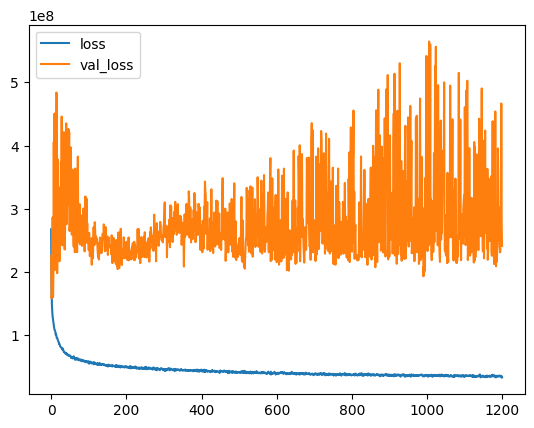

In [8]:
# let's use pandas for this (easy code)
# try to look if the model is actually training 
# => the error is going downwards
# if using validation data, you get two lines
# in this case, see if the lines follow a similar trend 
# (they don't always overlap with complex data, the trend is more important)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [9]:
from keras.models import load_model
model = load_model("best_model_regression1_cars.keras")

In [10]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
161804656.0

Train data evaluation:
152957760.0


In [11]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,Test True Y,Model Predictions
0,14113,16106.92
1,1019,23453.24
2,21473,26298.26
3,862,12855.20
4,10976,8244.23
...,...,...
2445,470,11537.95
2446,15053,12706.58
2447,20385,20229.18
2448,15053,14541.79


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

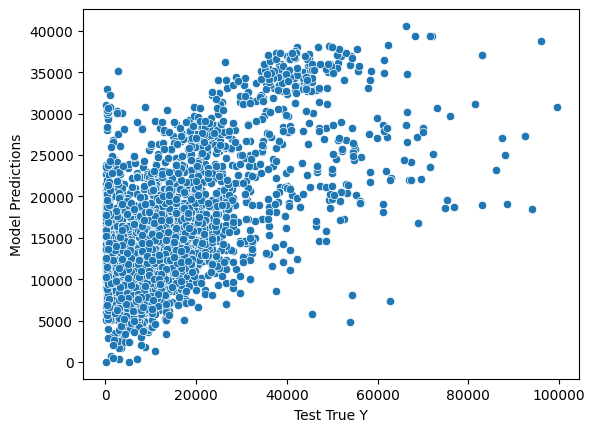

In [12]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [13]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
9204.77 $

MSE
161803376.0 $^2

RMSE:
12720.2 $

R-squared:
0.32

Explained variance score:
0.32


/tmp/ipykernel_231921/3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


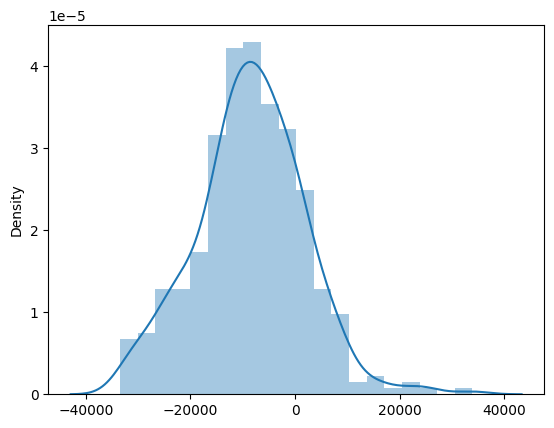

In [14]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [15]:
# Test a new entry: VW Polo
tester_row = {
    'Levy': 0, 
    'Manufacturer': 12, 
    'Model': 315, 
    'Prod. year': 2025,
    'Category': 3, 
    'Fuel type': 2, 
    'Engine volume': 2.0, 
    'Mileage': 0,
    'Cylinders': 4.0,
    'Gear box type': 4,
    'Drive wheels': 3,
    'Airbags': 5
}

tester_row = pd.DataFrame([tester_row])

In [16]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated car price with this example:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

2025-10-10 20:29:06.478635: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [1,12] vs. [1258]
	 [[{{node sequential_1/batch_normalization_1/batchnorm/mul_1}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/batch_normalization_1/batchnorm/mul_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 645, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 519, in dispatch_queue

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 508, in process_one

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code

  File "/tmp/ipykernel_231921/2369143858.py", line 1, in <module>

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 566, in predict

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 260, in one_step_on_data_distributed

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 250, in one_step_on_data

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 105, in predict_step

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/models/sequential.py", line 220, in call

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/models/functional.py", line 183, in call

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/ops/function.py", line 206, in _run_through_graph

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/models/functional.py", line 644, in call

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py", line 277, in call

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/ops/nn.py", line 2267, in batch_normalization

  File "/home/lukas/dev/venvs/DL/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 879, in batch_normalization

Incompatible shapes: [1,12] vs. [1258]
	 [[{{node sequential_1/batch_normalization_1/batchnorm/mul_1}}]] [Op:__inference_one_step_on_data_distributed_1707811]